In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset

In [2]:
df = pd.read_csv('/kaggle/input/textdb3/fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Display shape of dataset

In [3]:
df.shape

(6335, 4)

# Checking for missing values

In [4]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# Identify Labels

In [5]:
df.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

# Split dataset into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, 
                                                    random_state=42)

In [7]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


X_train shape (5068,)
X_test shape (1267,)
y_train shape (5068,)
y_test shape (1267,)


# Create TF-IDF vectorizer

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set

In [9]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform test set

In [10]:
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize Passive Aggressive Classifier

In [11]:
PAC = PassiveAggressiveClassifier(max_iter=50)
PAC.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

# Predict on test set

In [12]:
y_pred = PAC.predict(tfidf_test)

# Calculate accuracy

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9408050513022889


# Confusion Matrix

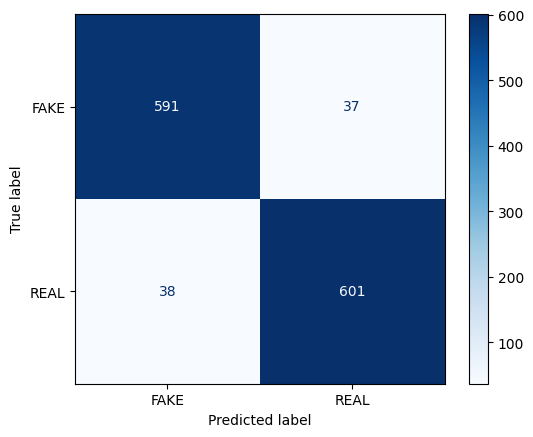

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=PAC.classes_)
cmat = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=PAC.classes_)
cmat.plot(cmap='Blues')
plt.show()